# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
MEDICAMENTOS = "Capitulo_3/drug200.csv"

def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path,sep= ",")
#Complementos con la dirección especifica de la base de datos que queremos.


In [8]:
# Visualiza el DataFrame
df = extraer_datos(DOWNLOAD_ROOT,MEDICAMENTOS)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Max Age: 74
Min Age: 15


<Figure size 900x500 with 0 Axes>

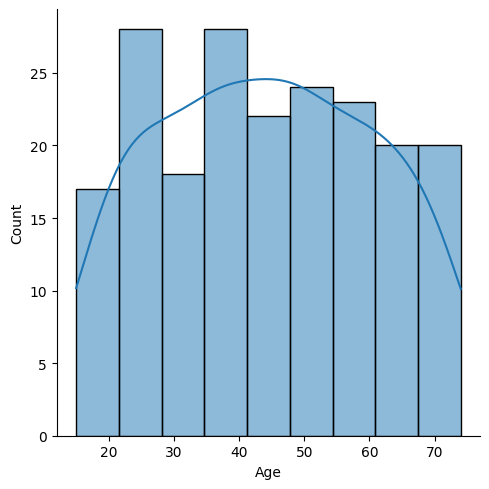

Sex
M    104
F     96
Name: count, dtype: int64

In [15]:
#Importa seaborn para tener gráficos más chidos 
%pip install seaborn
import seaborn as sns
#Gráfica la variable
print("Max Age:", df["Age"].max())
print("Min Age:", df["Age"].min())
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True)
plt.show()
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

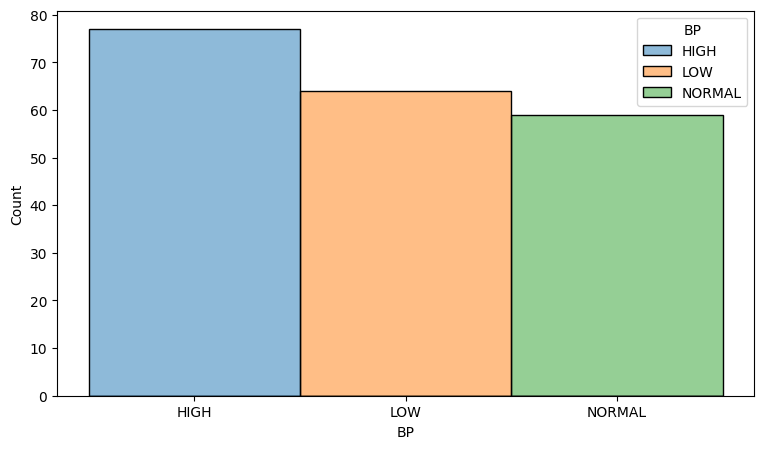

In [16]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP",hue="BP")
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Count'>

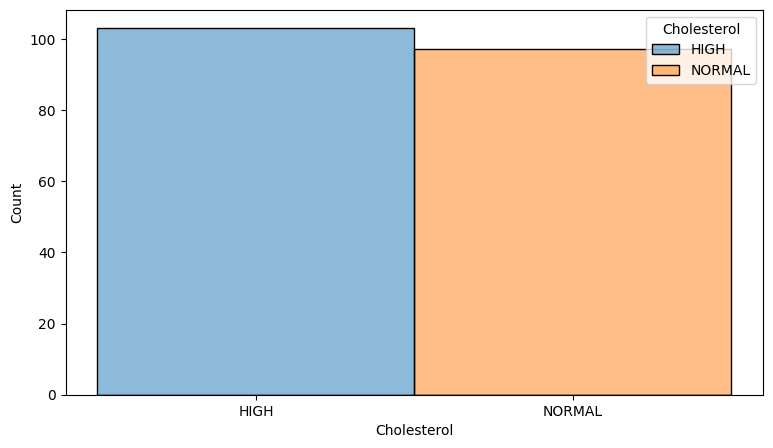

In [17]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))

sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")

<Figure size 900x500 with 0 Axes>

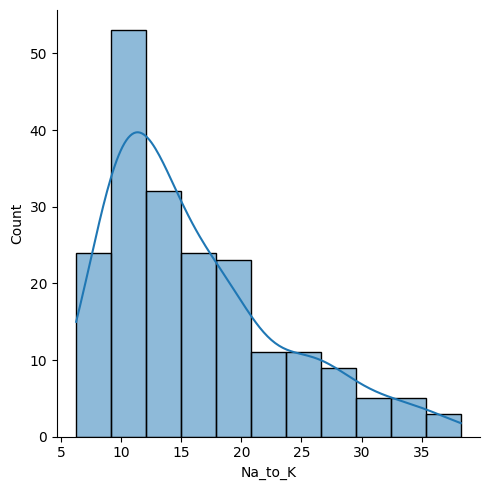

In [18]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))

sns.displot(df.Na_to_K,kde=True)
plt.show()

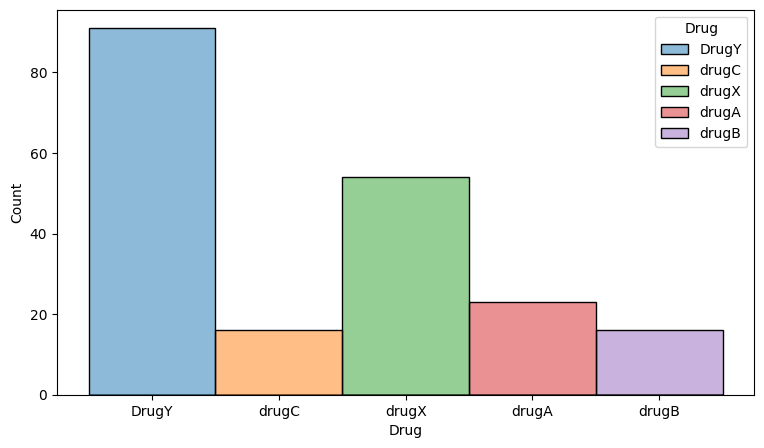

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [19]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize = (9,5))

sns.histplot(data=df,x="Drug",hue="Drug")
plt.show()
#Cuenta los medicamentos
df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


C:\Users\Arturo\AppData\Local\Temp\ipykernel_24720\3605465609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = "Drug", y = "Age",data = df, palette = "Set1")


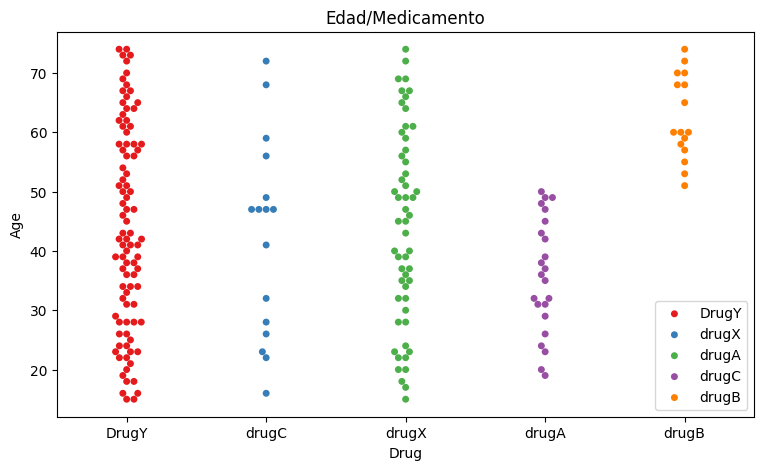

In [20]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))

sns.swarmplot(x = "Drug", y = "Age",data = df, palette = "Set1")

plt.legend(df.Drug.value_counts().index)

plt.title("Edad/Medicamento")
plt.show()

In [21]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name="Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


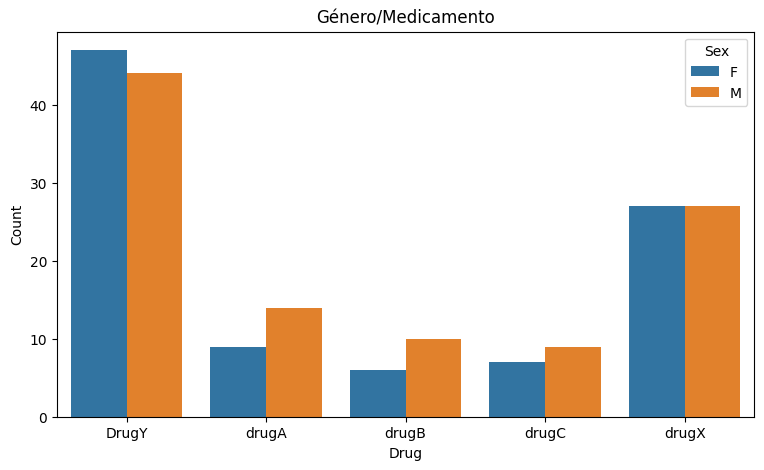

In [22]:
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)

plt.title("Género/Medicamento")
plt.show()

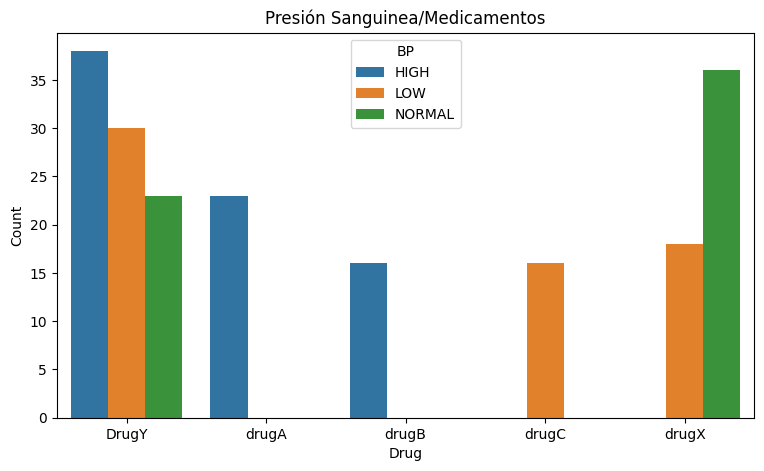

In [30]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug.head(8)
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)

plt.title("Presión Sanguinea/Medicamentos")
plt.show()

In [31]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")

print(df_CH_Drug)

    Drug Cholesterol  Count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34


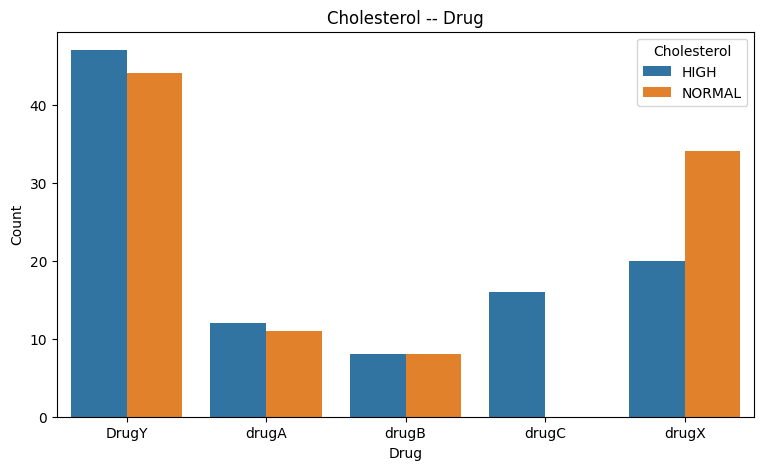

In [32]:
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)

plt.title("Cholesterol -- Drug")
plt.show()

C:\Users\Arturo\AppData\Local\Temp\ipykernel_24720\1021518303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = "Drug", y = "Na_to_K",data = df, palette="Set1")


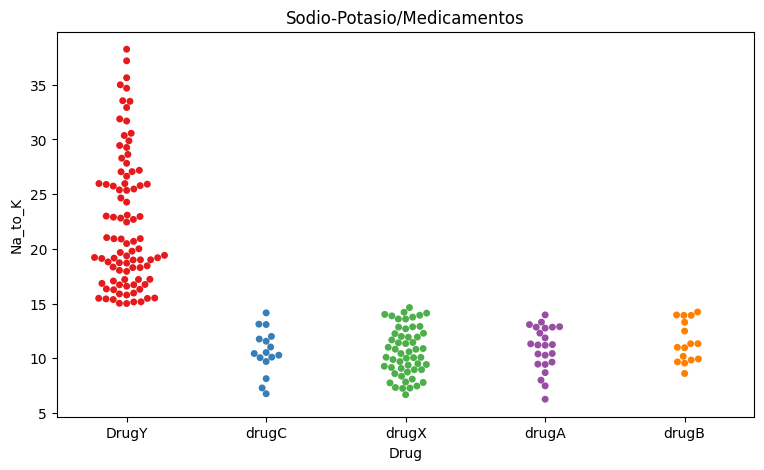

In [35]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))

sns.swarmplot(x = "Drug", y = "Na_to_K",data = df, palette="Set1")

plt.title("Sodio-Potasio/Medicamentos")
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [40]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

encoders = {}
def label_encoder(datos_categoria):

    le = LabelEncoder()

    df[datos_categoria] = le.fit_transform(df[datos_categoria])
    encoders[datos_categoria] = le
    
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:

    label_encoder(l)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [43]:
# Crear set de entrenamiento y set de prueba
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df["Drug"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [47]:
# Crear modelo para medicamento
y_train_c = (y_train == 0)
y_test_c = (y_test == 0)

print(y_train_c)

79     False
197    False
38     False
24      True
122     True
       ...  
106    False
14     False
92      True
179     True
102    False
Name: Drug, Length: 160, dtype: bool


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [52]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

In [53]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.fit(x_train,y_train_c)
sgd.predict([[47,1,1,0,8]])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [56]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

cross_val_score(sgd,x_train,y_train_c,cv=3,scoring="accuracy")

array([0.7962963 , 0.73584906, 0.71698113])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [57]:
# Modelo que nunca es Y


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [59]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd,x_train,y_train_c,cv=3)
print(y_train_pred)

[ True False False  True  True  True  True  True  True  True False  True
 False  True False  True False  True  True  True  True  True False  True
 False  True  True  True  True False False False  True  True  True  True
  True False  True False False  True  True False False  True False False
  True False  True  True  True  True  True  True  True  True False  True
  True False False False  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True False  True  True False  True  True  True  True
 False False  True  True  True  True  True  True  True  True False False
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True False False  True  True  True False  True  True
  True  True  True  True False  True  True False  True  True False  True
 False False  True False  True  True  True  True  True  True  True  True
  True  True  True  True]


In [63]:
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_c,y_train_pred)


array([[44, 40],
       [ 0, 76]])

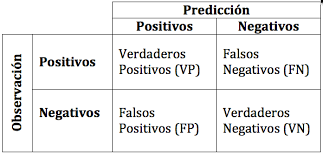

**Verdaderos Negativos**: esquina inferior derecha 

**Falsos positivos**: esquina inferior izquierda

**Falsos Negativos**: esquina superior derecha

**Verdaderos Positivos**: esquina superior izquierda 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [67]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

p = precision_score(y_train_c,y_train_pred)

r = recall_score(y_train_c,y_train_pred)

p,r

(0.6551724137931034, 1.0)

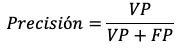

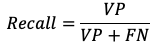

In [69]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(x_train,y_train_c)

y_train_pred = cross_val_predict(rfc,x_train,y_train_c,cv=3)
#Hacer la matriz de confusión otra vez
confusion_matrix(y_train_c,y_train_pred)

array([[84,  0],
       [ 2, 74]])

In [70]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_c,y_train_pred)

r = recall_score(y_train_c,y_train_pred)

p,r

(1.0, 0.9736842105263158)

In [71]:
#Calcular F1
from sklearn.metrics import f1_score
sgd_f1 = f1_score(y_train_c,y_train_pred)
print(sgd_f1)

0.9866666666666667


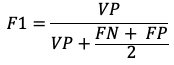

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [72]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8]])

print(y_score)

threshold = 0

y_some_pred = (y_score > threshold)
print(y_some_pred)

threshold = 2000

y_some_pred = (y_score > threshold)
print(y_some_pred)

[-22523.33667944]
[False]
[False]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


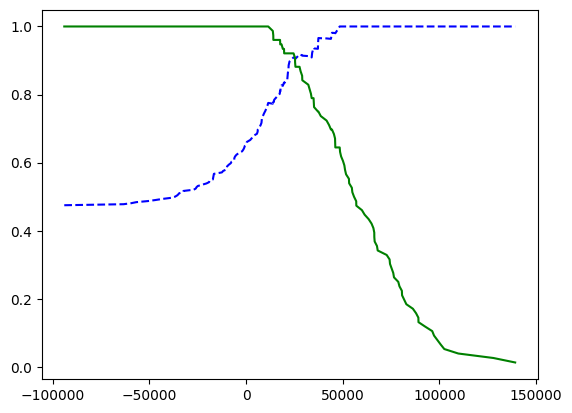

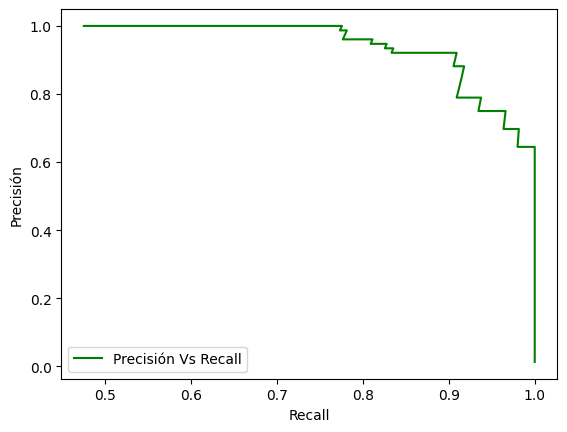

In [73]:
#Graficar la precisión y recall
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd,x_train,y_train_c,cv=3,method="decision_function")
precisions, recalls, umbrales = precision_recall_curve(y_train_c,y_scores)
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
plt.plot(umbrales, precisions[:-1],"b--",label="Precisión")

plt.plot(umbrales, recalls[:-1],"g-",label="Recall")

plt.show()
#Graficar la precisión y recall, ahora si
plt.plot(precisions[:-1], recalls[:-1],"g-",label="Precisión Vs Recall")

plt.xlabel("Recall")

plt.ylabel("Precisión")

plt.legend()

plt.show()


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [74]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]

umbral_90

np.float64(24575.640603301497)

In [75]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)
print(precision_score(y_train_c,y_train_90))
print(recall_score(y_train_c,y_train_90))

0.9090909090909091
0.9210526315789473


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [76]:
#Importar roc_curve
from sklearn.metrics import roc_curve

fpr, tpr, umbrales = roc_curve(y_train_c,y_scores)

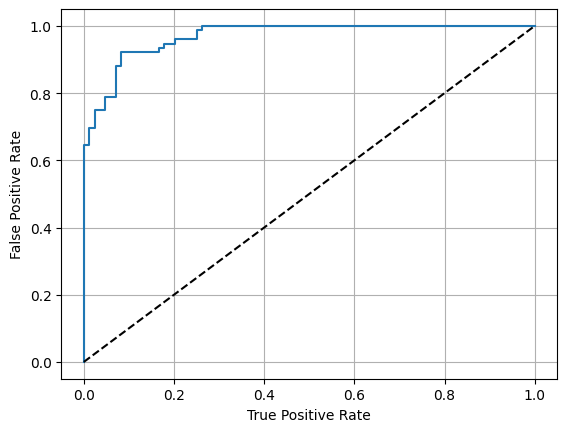

In [77]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="ROC Curve")

plt.plot([0, 1],[0, 1], 'k--')

plt.xlabel("True Positive Rate")

plt.ylabel("False Positive Rate")
#Poner una cuadrícula
plt.grid()

plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [78]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_c,y_scores)

0.9691416040100251

In [79]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_c,cv=3,method="predict_proba")
y_scores_forest = y_forest[:,1]
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_c, y_scores_forest)

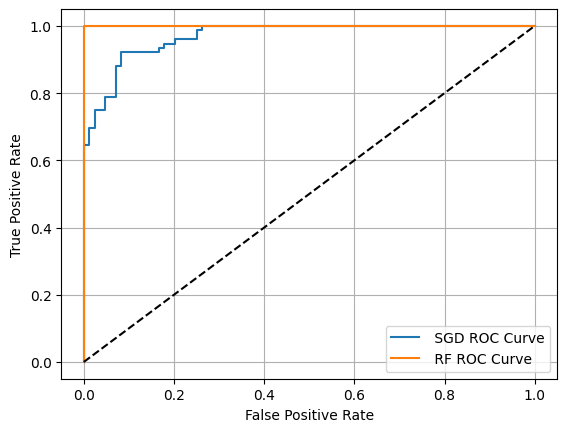

In [80]:
#Graficar la curva ROC y la predicción de random forest 
plt.plot(fpr, tpr, label=" SGD ROC Curve")

plt.plot(fpr_forest, tpr_forest, label=" RF ROC Curve")

plt.plot([0, 1],[0, 1], 'k--')

plt.legend()

plt.ylabel("True Positive Rate")

plt.xlabel("False Positive Rate")

plt.grid()

plt.show()

In [81]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_c,y_scores_forest)

1.0

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [82]:
# Importar SVC=Support Vector Classifier

from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train,y_train)

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm.predict([[25,0,1,0,167]])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [83]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167]])

print(some_scores)
#Decidirá por el qué tenga mayor puntaje
np.argmax(some_scores)

[[ 4.29349959  1.78865857  0.769853   -0.27117688  3.16304987]]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


np.int64(0)

In [84]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier

svm = OneVsRestClassifier(SVC())

svm.fit(x_train,y_train)
#Predecir a un humano ahora con este clasificador
svm.predict([[25,0,1,0,167]])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [85]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167]])

some_scores

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.3347801 , -1.0183752 , -1.01956626, -1.000855  , -1.08102198]])

In [86]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.predict([[25,0,1,0,167]])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

***

## <span style="color:green">8. Analizar Errores</span>

In [87]:
#Hacer un clasificador de random forest
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)

In [88]:
#Utilizar la matriz de confusión 
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [89]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd,x_train,y_train_c,cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[ 0, 76,  0,  0,  0],
       [ 8,  9,  0,  0,  0],
       [ 7,  6,  0,  0,  0],
       [ 6,  5,  0,  0,  0],
       [23, 20,  0,  0,  0]])

Clasificación binaria para Na_to_K_Bigger_Than_15

In [90]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
for col, encoder in encoders.items():
    if col in df.columns:
        if pd.api.types.is_integer_dtype(df[col]):
            df[col] = encoder.inverse_transform(df[col])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,1
2,47,1,1,0,43,3,1
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


In [93]:
#Corremos el modelo con las variables nuevas
sgd.fit(x_train, df.loc[x_train.index, 'Na_to_K_Bigger_Than_15'])
y_train_pred = cross_val_predict(sgd,x_train,y_train_c,cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[ 0, 76,  0,  0,  0],
       [ 8,  9,  0,  0,  0],
       [ 7,  6,  0,  0,  0],
       [ 6,  5,  0,  0,  0],
       [23, 20,  0,  0,  0]])

## <span style="color:green">9. Clasificación Multinivel</span>

In [96]:
#Crear un set de datos de medicamentos Y y A
y_0 = (y_train == 0)

y_5 = (y_train == 5)

y_multi = np.c_[y_0,y_5]
print(y_multi)

[[False False]
 [False False]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False Fa

In [97]:
#importa KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Predecir nuevo modelo
knn = KNeighborsClassifier()

knn.fit(x_train,y_multi)

knn.predict([[45,0,1,0,89]])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False, False]])

In [99]:
#Usaremos el parametro average con la palabra macro
y_train_pred = cross_val_predict(knn, x_train, y_multi, cv=3)

f1_score(y_multi,y_train_pred, average="macro")


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.4934210526315789

In [100]:
#Le decimos a la funcion que le asigne su peso correspondiente
y_train_pred = cross_val_predict(knn, x_train, y_multi, cv=3)

f1_score(y_multi,y_train_pred, average="weighted")

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.9868421052631579